In [1]:
input_file = 'data/data_multivar_nb.txt' 

In [2]:
with open(input_file,'r') as f:
    a = f.readlines()
    for line in a :
        print(line)
        break

2.18,0.57,0



In [3]:
import numpy as np
from Visual_Library import visualize_classifier

In [4]:
data = np.loadtxt(input_file,delimiter=',')

In [5]:
X, y = data[:,:-1],data[:,-1]

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
model = GaussianNB().fit(X,y)

In [8]:
y_pred = model.predict(X)

Accuracy of Naïve Bayes classifier = 99.75 %


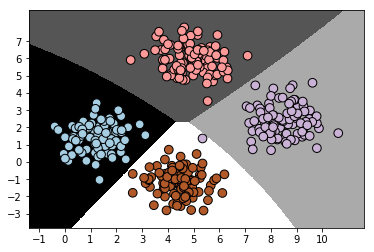

In [9]:
# Compute accuracy 
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0] 
print("Accuracy of Naïve Bayes classifier =", round(accuracy, 2), "%") 
 
# Visualize the performance of the classifier 
visualize_classifier(model, X, y) 

In [10]:
import sklearn.cross_validation as cross_validation

c:\python36_v5\envs\py3.6.5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Split data into training and test data  
# What is cross_validation.KFold ?
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=3) 
classifier_new = GaussianNB() 
classifier_new.fit(X_train, y_train) 
y_test_pred = classifier_new.predict(X_test) 

Accuracy of the new classifier Train = 99.69 %
Accuracy of the new classifier = 100.0 %


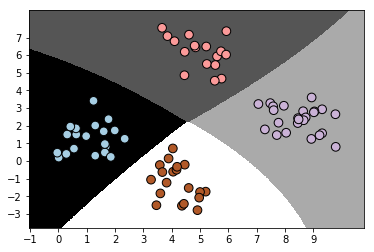

In [12]:
accuracy = 100.0 * (y_train == classifier_new.predict(X_train)).sum() / X_train.shape[0] 
print("Accuracy of the new classifier Train =", round(accuracy, 2), "%") 
# compute accuracy of the classifier 
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0] 
print("Accuracy of the new classifier =", round(accuracy, 2), "%") 
 
# Visualize the performance of the classifier 
visualize_classifier(classifier_new, X_test, y_test) 

In [13]:
from sklearn.cross_validation import cross_val_score
classifier = model
num_folds = 3 
accuracy_values = cross_val_score(classifier,
        X, y, scoring='accuracy', cv=num_folds) 
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%") 
 
precision_values = cross_val_score(classifier,  
        X, y, scoring='precision_weighted', cv=num_folds) 
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%") 
 
recall_values = cross_val_score(classifier,  
        X, y, scoring='recall_weighted', cv=num_folds) 
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%") 
 
f1_values = cross_val_score(classifier,  
        X, y, scoring='f1_weighted', cv=num_folds) 
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%") 

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
import matplotlib.pyplot as plt

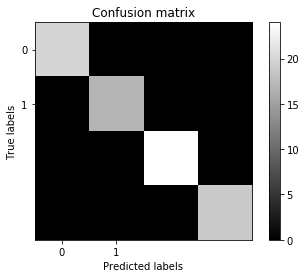


              precision    recall  f1-score   support

    Class-0       1.00      1.00      1.00        20
    Class-1       1.00      1.00      1.00        17

avg / total       1.00      1.00      1.00        80



c:\python36_v5\envs\py3.6.5\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 4, does not match size of target_names, 2
  .format(len(labels), len(target_names))


In [16]:
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

# Classification report
targets = ['Class-0', 'Class-1']
print('\n', classification_report(y_test, y_test_pred, target_names=targets))
